In [1]:
# %%
import pandas as pd
import tarfile
import io
from ALLCools.mcds import MCDS
import pyBigWig
import pandas as pd# %%
from wmb import cemba, mm10
import pybedtools


In [2]:
black_list_path = mm10.ENCODE_BLACKLIST_PATH

In [3]:
black_list_path

# %%
mch_pattern = 'CHN'
mcg_pattern = 'CGN'
n_top_feature = 20000

# %%
gene_meta_path = '/home/junyichen/code/whole_mouse_brain/wmb/files/modified_gencode.vM23.primary_assembly.annotation.gene.flat.tsv.gz'

# %%
chrom_to_remove = ['chrM', 'chrX', 'chrY']



In [4]:

mcds_expression = MCDS.open(
    '/data2st1/junyi/methlyatlas/mCseq/data.nemoarchive.org/biccn/grant/u19_cemba/ecker/epigenome/cellgroup/mCseq3/mouse/processed/counts/CEMBA.snmC.L4Region.AIBS_TENX.log1pCPM.zarr/',
     obs_dim='CellGroup'
)


In [5]:
var_dim = "geneslop2k-vm23"
mcds = MCDS.open('/data2st1/junyi/methlyatlas/mCseq/data.nemoarchive.org/biccn/grant/u19_cemba/ecker/epigenome/cellgroup/mCseq3/mouse/processed/counts/CEMBA.snmC.L4RegionAgg.zarr',
                   obs_dim='L4Region',var_dim=var_dim)


In [6]:
gene_meta = pd.read_csv(gene_meta_path, index_col='gene_id', sep='\t')


In [7]:
genes_to_skip = set()
chrom_to_remove = ['chrM']

# skip smaller genes mostly covered by a larger gene, e.g., a miRNA within a protein coding gene.
# F=0.9 means > 90% of gene_b is overlapped with gene_a, in this case, we only keep gene_a for DMG test
gene_bed = pybedtools.BedTool.from_dataframe(
    gene_meta.reset_index()[['chrom', 'start', 'end', 'gene_id']])
mapped_bam = gene_bed.map(b=gene_bed, c=4, o='distinct', F=0.9)
for _, (*_, gene_a, gene_b_str) in mapped_bam.to_dataframe().iterrows():
    for gene_b in gene_b_str.split(','):
        if gene_b != gene_a:
            genes_to_skip.add(gene_b)



***** WARNING: File /tmp/pybedtools.fn67c2_7.tmp has inconsistent naming convention for record:
GL456210.1	9124	58882	ENSMUSG00000079800

***** WARNING: File /tmp/pybedtools.fn67c2_7.tmp has inconsistent naming convention for record:
GL456210.1	9124	58882	ENSMUSG00000079800



In [8]:
genes_to_skip |= set(gene_meta.index[gene_meta['chrom'].isin(chrom_to_remove)])
use_features = gene_meta.index[~gene_meta.index.isin(genes_to_skip)]
print(f'{use_features.size} features remained')


28457 features remained


Using existing geneslop2k-vm23_cov_mean in MCDS.coords, if this is not desired, delete the existing results by `del mcds.coords["geneslop2k-vm23_cov_mean"]` and recalculate.


/tmp/ipykernel_1765096/820957101.py:6: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  use_features &= feature_cov_mean[feature_cov_mean > min_cov].index


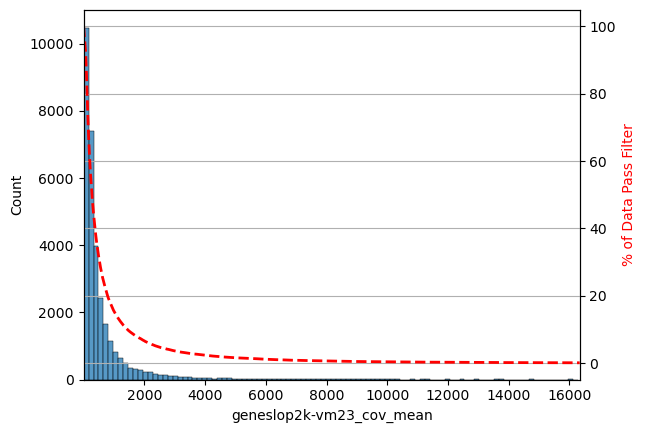

In [9]:
min_cov = 5

mcds.add_feature_cov_mean()

feature_cov_mean = mcds.coords[f'{var_dim}_cov_mean'].to_pandas()
use_features &= feature_cov_mean[feature_cov_mean > min_cov].index



"_ARRAY_DIMENSIONS": [
    "L4Region",
    "chrom100k",
    "mc_type",
    "count_type"
],


In [10]:
use_gene_meta = gene_meta.loc[use_features]


In [17]:
use_gene_meta = pd.read_csv("/home/junyichen/code/scmmd/output/GeneMetadata.csv.gz",index_col=0)

In [18]:
use_gene_meta

,chrom,source,feature,start,end,score,strand,phase,transcript_id,gene_type,...,transcript_type,transcript_status,transcript_name,exon_number,exon_id,level,gene_version,mgi_id,havana_gene,tag
ENSMUSG00000051951,chr1,HAVANA,gene,3205901,3671498,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,5,MGI:3528744,OTTMUSG00000026353.2,NaN
ENSMUSG00000102343,chr1,HAVANA,gene,3905739,3986215,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610609,OTTMUSG00000049934.1,NaN
ENSMUSG00000025900,chr1,HAVANA,gene,3999557,4409241,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,12,MGI:1341105,OTTMUSG00000049985.3,overlapping_locus
ENSMUSG00000025902,chr1,HAVANA,gene,4490931,4497354,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,13,MGI:107543,OTTMUSG00000050014.7,NaN
ENSMUSG00000104238,chr1,HAVANA,gene,4496551,4499558,.,+,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610815,OTTMUSG00000050024.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100574,chrY,HAVANA,gene,89636206,89639438,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579380,OTTMUSG00000047315.1,NaN
ENSMUSG00000100608,chrY,HAVANA,gene,89713424,89745532,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5440224,OTTMUSG00000047316.1,NaN
ENSMUSG00000102011,chrY,HAVANA,gene,89927120,89935013,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579636,OTTMUSG00000047349.1,NaN
ENSMUSG00000096178,chrY,HAVANA,gene,90401248,90433263,.,+,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,7,MGI:5434193,OTTMUSG00000047352.1,NaN


In [11]:
gtf_path = '/data2st1/junyi/ref/gencode.vM23.chr_patch_hapl_scaff.annotation.gtf.gz'


In [62]:
z['/geneslop2k-vm23_da/'][:100,:100,1,0].max()

133824

In [5]:
from ALLCools.mcds import MCDS

import pandas as pd


In [2]:
var_dim = "chrom100k"
mcds = MCDS.open('/data2st1/junyi/methlyatlas/mCseq/data.nemoarchive.org/biccn/grant/u19_cemba/ecker/epigenome/cellgroup/mCseq3/mouse/processed/counts/CEMBA.snmC.L4RegionAgg.zarr',
                   obs_dim='L4Region',var_dim='chrom100k')


In [3]:
mcds

<xarray.MCDS>
Dimensions:                   (L4Region: 4673, chrom100k: 27269, count_type: 2,
                               mc_type: 2, geneslop2k-vm23: 32208)
Coordinates: (12/13)
  * L4Region                  (L4Region) <U18 'c0_c0_c0_c0_r0' ... 'c9_c1_c2_...
  * chrom100k                 (chrom100k) <U10 'chr1_0' 'chr1_1' ... 'chrY_917'
    chrom100k_chrom           (chrom100k) <U5 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_cov_mean        (chrom100k) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    chrom100k_end             (chrom100k) int64 100000 200000 ... 91744698
    chrom100k_start           (chrom100k) int64 0 100000 ... 91600000 91700000
    ...                        ...
  * mc_type                   (mc_type) <U3 'CGN' 'CHN'
  * geneslop2k-vm23           (geneslop2k-vm23) <U18 'ENSMUSG00000051951' ......
    geneslop2k-vm23_chrom     (geneslop2k-vm23) <U5 'chr1' 'chr1' ... 'chrM'
    geneslop2k-vm23_cov_mean  (geneslop2k-vm23) float64 6.313e+03 ... 312.2
    geneslop2k-vm23_end       (geneslop2k-vm23) int64 3673498 3515553 ... 16299
    geneslop2k-vm23_start     (geneslop2k-vm23) int64 3203901 3464587 ... 12145
Data variables:
    chrom100k_da              (L4Region, chrom100k, mc_type, count_type) uint64 dask.array<chunksize=(4673, 27269, 1, 1), meta=np.ndarray>
    geneslop2k-vm23_da        (L4Region, geneslop2k-vm23, mc_type, count_type) uint64 dask.array<chunksize=(4673, 32208, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  L4Region
    var_dim:  chrom100k

Using existing chrom100k_cov_mean in MCDS.coords, if this is not desired, delete the existing results by `del mcds.coords["chrom100k_cov_mean"]` and recalculate.


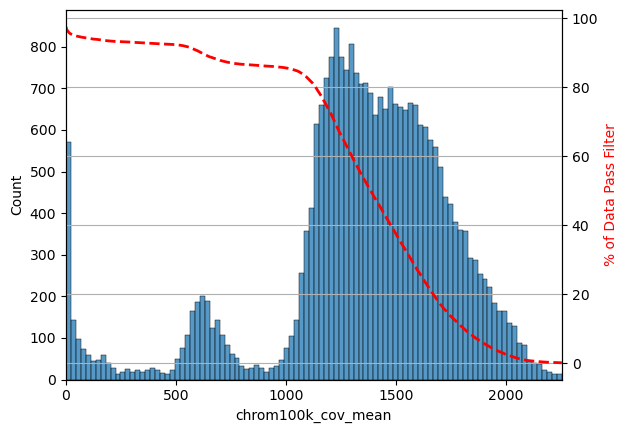

In [75]:
var_dim = "chrom100k"
mcds.add_feature_cov_mean(var_dim=var_dim)


In [77]:
from wmb import cemba, mm10

In [78]:
black_list_path = mm10.ENCODE_BLACKLIST_PATH


In [79]:
black_list_path

PosixPath('/home/junyichen/code/scmmd/wmb/files/mm10-blacklist.v2.bed.gz')

In [80]:
mcds = mcds.remove_black_list_region(
    black_list_path=black_list_path,
    f=0.2  # Features having overlap > f with any black list region will be removed.
)


2873 chrom100k features removed due to overlapping (bedtools intersect -f 0.2) with black list regions.


In [81]:
mcds = mcds.remove_chromosome(['chrM', 'chrX', 'chrY'])

1581 chrom100k features in ['chrM', 'chrX', 'chrY'] removed.


In [82]:
with open('output/FeatureList.BasicFilter.txt', 'w') as f:
    for var in mcds.get_index(mcds.var_dim).astype(str):
        f.write(var + '\n')

In [83]:
mcds.add_mc_frac(
normalize_per_cell=True,  # after calculating mC frac, per cell normalize the matrix
    clip_norm_value=10  # clip outlier values above 10 to 10
)


In [84]:
mch_pattern = 'CHN'
mcg_pattern = 'CGN'
n_top_feature = 20000

mch_hvf = mcds.calculate_hvf_svr(var_dim=var_dim,
                                 mc_type=mch_pattern,
                                 n_top_feature=n_top_feature,
                                 plot=True)


/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Fitting SVR with gamma 0.0440, predicting feature dispersion using mc_frac_mean and cov_mean.
Total Feature Number:     22830
Highly Variable Feature:  20000 (87.6%)


In [85]:
mcg_hvf = mcds.calculate_hvf_svr(var_dim=var_dim,
                                 mc_type=mcg_pattern,
                                 n_top_feature=n_top_feature,
                                 plot=True)


/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Fitting SVR with gamma 0.0440, predicting feature dispersion using mc_frac_mean and cov_mean.
Total Feature Number:     22830
Highly Variable Feature:  20000 (87.6%)


In [86]:
gene_meta_path = '/home/junyichen/code/whole_mouse_brain/wmb/files/gencode.vM22.annotation.gene.flat.tsv.gz'

In [ ]:
chrom_to_remove = ['chrM', 'chrX', 'chrY']


In [6]:
var_dim = "geneslop2k-vm23"
mcds = MCDS.open('/data2st1/junyi/methlyatlas/mCseq/data.nemoarchive.org/biccn/grant/u19_cemba/ecker/epigenome/cellgroup/mCseq3/mouse/processed/counts/CEMBA.snmC.L4RegionAgg.zarr',
                   obs_dim='L4Region',var_dim=var_dim)


In [7]:
abs(mcds['geneslop2k-vm23_start']-mcds['geneslop2k-vm23_end']).min()

<xarray.DataArray ()>
array(4009)

In [8]:
gene_meta_path = '/home/junyichen/code/whole_mouse_brain/wmb/files/modified_gencode.vM23.primary_assembly.annotation.gene.flat.tsv.gz'


In [9]:
gene_meta = pd.read_csv(gene_meta_path, index_col='gene_id', sep='\t')


In [10]:
gene_meta

,chrom,source,feature,start,end,score,strand,phase,transcript_id,gene_type,...,transcript_type,transcript_status,transcript_name,exon_number,exon_id,level,gene_version,mgi_id,havana_gene,tag
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000051951,chr1,HAVANA,gene,3205901,3671498,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,5,MGI:3528744,OTTMUSG00000026353.2,NaN
ENSMUSG00000089699,chr1,HAVANA,gene,3466587,3513553,.,+,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:3780162,OTTMUSG00000026352.1,NaN
ENSMUSG00000102331,chr1,HAVANA,gene,3647309,3658904,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5012123,OTTMUSG00000049924.1,NaN
ENSMUSG00000102343,chr1,HAVANA,gene,3905739,3986215,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610609,OTTMUSG00000049934.1,NaN
ENSMUSG00000025900,chr1,HAVANA,gene,3999557,4409241,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,12,MGI:1341105,OTTMUSG00000049985.3,overlapping_locus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000095523,JH584299.1,ENSEMBL,gene,837364,840451,.,+,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
ENSMUSG00000095475,JH584299.1,ENSEMBL,gene,910289,913083,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
ENSMUSG00000094855,JH584299.1,ENSEMBL,gene,921942,924675,.,+,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN


In [11]:
import pybedtools

genes_to_skip = set()
chrom_to_remove = ['chrM']

# skip smaller genes mostly covered by a larger gene, e.g., a miRNA within a protein coding gene.
# F=0.9 means > 90% of gene_b is overlapped with gene_a, in this case, we only keep gene_a for DMG test
gene_bed = pybedtools.BedTool.from_dataframe(
    gene_meta.reset_index()[['chrom', 'start', 'end', 'gene_id']])
mapped_bam = gene_bed.map(b=gene_bed, c=4, o='distinct', F=0.9)
for _, (*_, gene_a, gene_b_str) in mapped_bam.to_dataframe().iterrows():
    for gene_b in gene_b_str.split(','):
        if gene_b != gene_a:
            genes_to_skip.add(gene_b)

# remove certain chromosomes
genes_to_skip |= set(gene_meta.index[gene_meta['chrom'].isin(chrom_to_remove)])
use_features = gene_meta.index[~gene_meta.index.isin(genes_to_skip)]
print(f'{use_features.size} features remained')

***** WARNING: File /tmp/pybedtools.8cfzmhm4.tmp has inconsistent naming convention for record:
GL456210.1	9124	58882	ENSMUSG00000079800

***** WARNING: File /tmp/pybedtools.8cfzmhm4.tmp has inconsistent naming convention for record:
GL456210.1	9124	58882	ENSMUSG00000079800



28457 features remained


In [12]:
use_features

Index(['ENSMUSG00000051951', 'ENSMUSG00000102343', 'ENSMUSG00000025900',
       'ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000104328',
       'ENSMUSG00000033845', 'ENSMUSG00000025903', 'ENSMUSG00000033813',
       'ENSMUSG00000002459',
       ...
       'ENSMUSG00000096550', 'ENSMUSG00000094172', 'ENSMUSG00000094887',
       'ENSMUSG00000091585', 'ENSMUSG00000095763', 'ENSMUSG00000095523',
       'ENSMUSG00000095475', 'ENSMUSG00000094855', 'ENSMUSG00000095019',
       'ENSMUSG00000095041'],
      dtype='object', name='gene_id', length=28457)

Using existing geneslop2k-vm23_cov_mean in MCDS.coords, if this is not desired, delete the existing results by `del mcds.coords["geneslop2k-vm23_cov_mean"]` and recalculate.


/tmp/ipykernel_1731177/3447539451.py:6: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  use_features &= feature_cov_mean[feature_cov_mean > min_cov].index


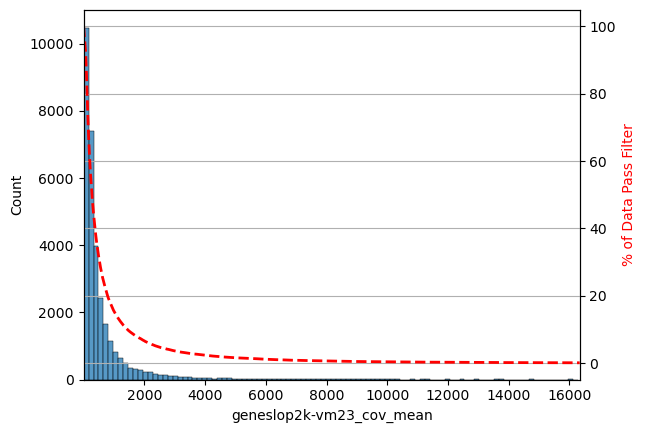

In [13]:

min_cov = 5

mcds.add_feature_cov_mean()

feature_cov_mean = mcds.coords[f'{var_dim}_cov_mean'].to_pandas()
use_features &= feature_cov_mean[feature_cov_mean > min_cov].index


In [14]:
use_features

Index(['ENSMUSG00000051951', 'ENSMUSG00000102343', 'ENSMUSG00000025900',
       'ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000104328',
       'ENSMUSG00000033845', 'ENSMUSG00000025903', 'ENSMUSG00000033813',
       'ENSMUSG00000002459',
       ...
       'ENSMUSG00000101533', 'ENSMUSG00000102045', 'ENSMUSG00000100492',
       'ENSMUSG00000099982', 'ENSMUSG00000101402', 'ENSMUSG00000100574',
       'ENSMUSG00000100608', 'ENSMUSG00000102011', 'ENSMUSG00000096178',
       'ENSMUSG00000096768'],
      dtype='object', length=27651)

In [15]:
use_gene_meta = gene_meta.loc[use_features]


In [16]:
use_gene_meta

,chrom,source,feature,start,end,score,strand,phase,transcript_id,gene_type,...,transcript_type,transcript_status,transcript_name,exon_number,exon_id,level,gene_version,mgi_id,havana_gene,tag
ENSMUSG00000051951,chr1,HAVANA,gene,3205901,3671498,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,5,MGI:3528744,OTTMUSG00000026353.2,NaN
ENSMUSG00000102343,chr1,HAVANA,gene,3905739,3986215,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610609,OTTMUSG00000049934.1,NaN
ENSMUSG00000025900,chr1,HAVANA,gene,3999557,4409241,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,12,MGI:1341105,OTTMUSG00000049985.3,overlapping_locus
ENSMUSG00000025902,chr1,HAVANA,gene,4490931,4497354,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,13,MGI:107543,OTTMUSG00000050014.7,NaN
ENSMUSG00000104238,chr1,HAVANA,gene,4496551,4499558,.,+,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610815,OTTMUSG00000050024.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100574,chrY,HAVANA,gene,89636206,89639438,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579380,OTTMUSG00000047315.1,NaN
ENSMUSG00000100608,chrY,HAVANA,gene,89713424,89745532,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5440224,OTTMUSG00000047316.1,NaN
ENSMUSG00000102011,chrY,HAVANA,gene,89927120,89935013,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579636,OTTMUSG00000047349.1,NaN
ENSMUSG00000096178,chrY,HAVANA,gene,90401248,90433263,.,+,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,7,MGI:5434193,OTTMUSG00000047352.1,NaN


In [18]:
use_gene_meta.to_csv('output/GeneMetadata.csv.gz')


In [17]:
gtf_path = '/data2st1/junyi/ref/gencode.vM23.chr_patch_hapl_scaff.annotation.gtf.gz'

In [45]:
gene_meta = pd.read_csv(gtf_path, sep='\t',skiprows=5,header=None)


In [71]:
gene_meta

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ..."
...,...,...,...,...,...,...,...,...,...
1891070,KZ289075.1,ENSEMBL,start_codon,321992,321994,.,-,0,"gene_id ""ENSMUSG00000116268.1""; transcript_id ..."
1891071,KZ289075.1,ENSEMBL,exon,321041,321594,.,-,.,"gene_id ""ENSMUSG00000116268.1""; transcript_id ..."
1891072,KZ289075.1,ENSEMBL,CDS,321041,321594,.,-,0,"gene_id ""ENSMUSG00000116268.1""; transcript_id ..."
1891073,KZ289075.1,ENSEMBL,exon,319599,319995,.,-,.,"gene_id ""ENSMUSG00000116268.1""; transcript_id ..."


In [48]:
mcds["L4Region"]

<xarray.DataArray 'L4Region' (L4Region: 4673)>
array(['c0_c0_c0_c0_r0', 'c0_c0_c0_c0_r1', 'c0_c0_c0_c0_r2', ...,
       'c9_c1_c2_c1_r1', 'c9_c1_c2_c1_r2', 'c9_c1_c2_c2_r0'], dtype='<U18')
Coordinates:
  * L4Region  (L4Region) <U18 'c0_c0_c0_c0_r0' ... 'c9_c1_c2_c2_r0'

In [55]:
df_region = pd.read_csv('/data2st1/junyi/methlyatlas/atac/Subclass.names.map.csv.gz',index_col=0)

In [56]:
df_region

,subclass_id_label,subclass_label,subclass_label_bw,subclass_label_peak,subclass_id_label_bw,subclass_label_mCG
subclass_id,,,,,,
1,001 CLA-EPd-CTX Car3 Glut,CLA-EPd-CTX Car3 Glut,CLA-EPd-CTX_Car3_Glut,CLA-EPd-CTX_Car3_Glut,001_CLA-EPd-CTX_Car3_Glut,CLA-EPd-CTX_Car3_Glut
2,002 IT EP-CLA Glut,IT EP-CLA Glut,IT_EP-CLA_Glut,IT_EP-CLA_Glut,002_IT_EP-CLA_Glut,IT_EP-CLA_Glut
3,003 L5/6 IT TPE-ENT Glut,L5/6 IT TPE-ENT Glut,L5.6_IT_TPE-ENT_Glut,L5-6_IT_TPE-ENT_Glut,003_L5.6_IT_TPE-ENT_Glut,L5_6_IT_TPE-ENT_Glut
4,004 L6 IT CTX Glut,L6 IT CTX Glut,L6_IT_CTX_Glut,L6_IT_CTX_Glut,004_L6_IT_CTX_Glut,L6_IT_CTX_Glut
5,005 L5 IT CTX Glut,L5 IT CTX Glut,L5_IT_CTX_Glut,L5_IT_CTX_Glut,005_L5_IT_CTX_Glut,L5_IT_CTX_Glut
...,...,...,...,...,...,...
335,335 BAM NN,BAM NN,BAM_NN,BAM_NN,335_BAM_NN,BAM_NN
336,336 Monocytes NN,Monocytes NN,Monocytes_NN,Monocytes_NN,336_Monocytes_NN,Monocytes_NN
337,337 DC NN,DC NN,DC_NN,DC_NN,337_DC_NN,DC_NN


In [57]:
df_meta_integrateion = pd.read_csv("/data2st1/junyi/methlyatlas/mCseq/CEMBA.mC.Metadata/CEMBA.mC.Metadata.csv")

In [59]:
df_meta_integrateion.drop_duplicates(subset='CellGroup',inplace=True)

In [64]:
df_meta_integrateion.set_index('CellGroup',inplace=True)

In [67]:
df_meta_integrateion.loc[mcds["L4Region"]]

,cell,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,DissectionRegion,Plate,Col384,Row384,Slice,...,Technology,InputReads,PassBasicQC,PlateNormCov,CEMBARegion,MajorRegion,SubRegion,SubClass,Class,NeuroTransmitters
CellGroup,,,,,,,,,,,,,,,,,,,,,
c0_c0_c0_c0_r0,15B_M_33,0.012157,0.860527,0.051404,1416795.0,CB-2,CEMBA210805_15B_3,20,8,15,...,snmC-seq3,3682182,True,1.125066,15B,CB,CBX,MY Lhx1 Gly-Gaba,MY GABA,Gly-Gaba
c0_c0_c0_c0_r1,15C_M_24,0.010605,0.829453,0.051471,1920470.0,MY-1,CEMBA210415_15C_2,18,6,15,...,snmC-seq3,5471632,True,1.079427,15C,HB,"MY,P",MY Lhx1 Gly-Gaba,MY GABA,Gly-Gaba
c0_c0_c0_c0_r2,7G_M_1307,0.009422,0.815386,0.050455,1513917.0,TH-2,CEMBA190702_7G_3,14,11,7,...,snmC-seq2,3835872,True,0.927866,7G,TH,TH,MY Lhx1 Gly-Gaba,MY GABA,Gly-Gaba
c0_c0_c0_c0_r3,9L_M_1443,0.008626,0.829145,0.044889,720642.0,HY-4,CEMBA200305_9L_4,20,15,9,...,snmC-seq2,1786156,True,0.558508,9L,HY,HY,MY Lhx1 Gly-Gaba,MY GABA,Gly-Gaba
c0_c0_c0_c0_r4,12G_M_92,0.010278,0.790141,0.048931,1188139.0,PAG-1,CEMBA210211_12G_2,0,7,12,...,snmC-seq3,3497300,True,0.712865,12G,MB,MB,MY Lhx1 Gly-Gaba,MY GABA,Gly-Gaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c9_c1_c2_c0_r1,12E_M_14,0.007262,0.762787,0.017747,881296.0,RHP-4,CEMBA200820_12E_4,2,3,12,...,snmC-seq3,2018850,True,0.623387,12E,HPF,"CA,DG,RHP",DG Glut,DG-IMN Glut,Glut
c9_c1_c2_c1_r0,11E_M_1029,0.004180,0.753392,0.013080,1029495.0,CA-iv,CEMBA190214_11E_4,12,4,11,...,snmC-seq2,2251626,True,0.863527,11E,HPF,CA,DG Glut,DG-IMN Glut,Glut
c9_c1_c2_c1_r1,10E_M_1685,0.003896,0.737562,0.011256,1800469.0,CA-iii,CEMBA190627_10E_1,16,2,10,...,snmC-seq2,4943432,True,0.912603,10E,HPF,CA,DG Glut,DG-IMN Glut,Glut


In [65]:
df_meta_integrateion

,cell,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,DissectionRegion,Plate,Col384,Row384,Slice,...,Technology,InputReads,PassBasicQC,PlateNormCov,CEMBARegion,MajorRegion,SubRegion,SubClass,Class,NeuroTransmitters
CellGroup,,,,,,,,,,,,,,,,,,,,,
c18_c4_c1_c1_r0,10A_M_1,0.008874,0.819390,0.036336,1073981.0,RSP-4,CEMBA190423_10A_1,0,1,10,...,snmC-seq2,2252674,True,0.834409,10A,Isocortex,RSP,L6b CTX Glut,NP-CT-L6b Glut,Glut
c24_c0_c0_c0_r2,10A_M_100,0.007105,0.762382,0.019705,1108484.0,RSP-4,CEMBA190423_10A_2,0,3,10,...,snmC-seq2,2549478,True,0.842048,10A,Isocortex,RSP,L2/3 IT RSP Glut,IT-ET Glut,Glut
c2_c3_c4_c2_r0,10A_M_1001,0.007433,0.780743,0.029361,1372174.0,RSP-4,CEMBA190423_10A_3,8,4,10,...,snmC-seq2,3220214,True,0.942444,10A,Isocortex,RSP,L6 CT CTX Glut,NP-CT-L6b Glut,Glut
c24_c1_c0_c0_r2,10A_M_1004,0.007096,0.760142,0.025248,1797787.0,RSP-4,CEMBA190423_10A_3,9,5,10,...,snmC-seq2,5189858,True,1.234766,10A,Isocortex,RSP,L2/3 IT RSP Glut,IT-ET Glut,Glut
c24_c2_c0_c0_r1,10A_M_1005,0.006372,0.755418,0.018152,1783439.0,RSP-4,CEMBA190423_10A_4,8,4,10,...,snmC-seq2,4193516,True,1.273785,10A,Isocortex,RSP,L2/3 IT RSP Glut,IT-ET Glut,Glut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c21_c7_c0_c0_r2,17A_M_125,0.006760,0.781919,0.025544,1654905.0,CB-4,CEMBA210812_17A_4,7,15,17,...,snmC-seq3,4532372,True,1.157685,17A,CB,CBX,CBX Purkinje Gaba,CB GABA,Gaba
c21_c2_c0_c0_r2,17A_M_159,0.009153,0.773622,0.027164,684447.0,CB-4,CEMBA210810_17A_1,17,8,17,...,snmC-seq3,2335324,True,0.829043,17A,CB,CBX,CBX Purkinje Gaba,CB GABA,Gaba
c52_c1_c0_c0_r1,17A_M_194,0.011407,0.825454,0.051443,947052.0,CB-4,CEMBA210810_17A_1,9,1,17,...,snmC-seq3,3491760,True,1.147126,17A,CB,CBX,CBN Neurod2 Pvalb Glut,MY Glut,Glut


In [ ]:
import pyBigWig


In [171]:
bw = pyBigWig.open("/data2st1/junyi/methlyatlas/atac/catlas.org/renlab_downloads/wholemousebrain/bigwig_macs2/001_CLA-EPd-CTX_Car3_Glut.bw")

In [172]:
bw.isBigWig()

True

In [173]:
use_gene_meta

,chrom,source,feature,start,end,score,strand,phase,transcript_id,gene_type,...,transcript_type,transcript_status,transcript_name,exon_number,exon_id,level,gene_version,mgi_id,havana_gene,tag
ENSMUSG00000051951,chr1,HAVANA,gene,3205901,3671498,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,5,MGI:3528744,OTTMUSG00000026353.2,NaN
ENSMUSG00000102343,chr1,HAVANA,gene,3905739,3986215,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610609,OTTMUSG00000049934.1,NaN
ENSMUSG00000025900,chr1,HAVANA,gene,3999557,4409241,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,12,MGI:1341105,OTTMUSG00000049985.3,overlapping_locus
ENSMUSG00000025902,chr1,HAVANA,gene,4490931,4497354,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,13,MGI:107543,OTTMUSG00000050014.7,NaN
ENSMUSG00000104238,chr1,HAVANA,gene,4496551,4499558,.,+,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5610815,OTTMUSG00000050024.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100574,chrY,HAVANA,gene,89636206,89639438,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579380,OTTMUSG00000047315.1,NaN
ENSMUSG00000100608,chrY,HAVANA,gene,89713424,89745532,.,-,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5440224,OTTMUSG00000047316.1,NaN
ENSMUSG00000102011,chrY,HAVANA,gene,89927120,89935013,.,-,.,NaN,lncRNA,...,NaN,NaN,NaN,NaN,NaN,2,1,MGI:5579636,OTTMUSG00000047349.1,NaN
ENSMUSG00000096178,chrY,HAVANA,gene,90401248,90433263,.,+,.,NaN,protein_coding,...,NaN,NaN,NaN,NaN,NaN,2,7,MGI:5434193,OTTMUSG00000047352.1,NaN


In [192]:
stats =[]
for gene in use_gene_meta.index:
    chrom = use_gene_meta.loc[gene, 'chrom']
    start = use_gene_meta.loc[gene, 'start']
    end = use_gene_meta.loc[gene, 'end']
    
    values = bw.values(chrom, start-2000, start)
    arr_values = np.array(values)
    arr_values = np.nan_to_num(arr_values)
    stats.append(arr_values.sum())

In [193]:
values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Text(0.5, 1.0, 'Histogram of Random Data')

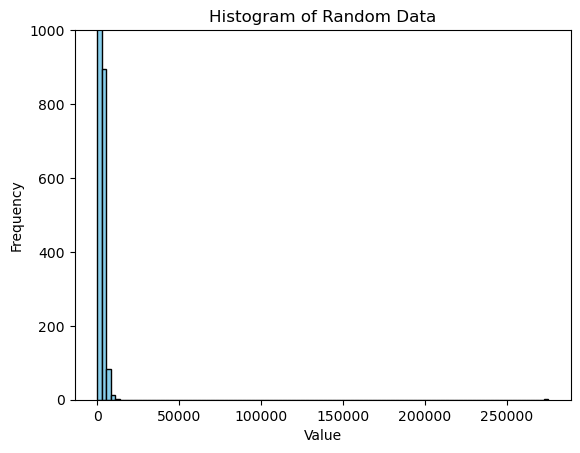

In [195]:
import matplotlib.pyplot as plt

plt.hist(stats, bins=100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim(0,1000)
plt.title('Histogram of Random Data')


In [196]:
np.array(stats).max()

275222.1675872803

In [177]:
import numpy as np
array=np.array(bw.values("chr1", 3205901-2000, 3205901))

In [178]:
array = np.nan_to_num(array, nan=0).mean()
array

0.1357916298462078

In [179]:
arr = array
result = arr[(arr > 0) & (arr < 1)]
result

array([0.13579163])

In [197]:
bw_atac = pyBigWig.open("/data2st1/junyi/methlyatlas/atac/catlas.org/renlab_downloads/wholemousebrain/bigwig_macs2/001_CLA-EPd-CTX_Car3_Glut.bw")

In [201]:
values = bw_atac.values(chrom, 3205901, 3671498)
np.array(values).max()

0.008299999870359898

In [181]:
stats =[]
for gene in use_gene_meta.index:
    chrom = use_gene_meta.loc[gene, 'chrom']
    start = use_gene_meta.loc[gene, 'start']
    end = use_gene_meta.loc[gene, 'end']
    
    values = bw.values(chrom, start-2000, start)
    arr_values = np.array(values)
    arr_values = np.nan_to_num(arr_values)
    stats.append(arr_values.mean())

In [6]:
import numpy as np
astro_stat = np.load('/home/junyichen/code/scmmd/output/Astro-NT_NN/CGN_stats.npy')

In [7]:
astro_stat_atac = np.load('/home/junyichen/code/scmmd/output/318_Astro-NT_NN/atac_stats.npy')

In [26]:
astro_stat

array([0.00487988, 0.004521  , 0.02123437, ..., 0.00355359, 0.00195471,
       0.001     ])

In [27]:
astro_stat_atac

array([3.19634601e+01, 3.24777002e+01, 3.53209702e+01, ...,
       1.07800001e-02, 2.08740002e-01, 0.00000000e+00])

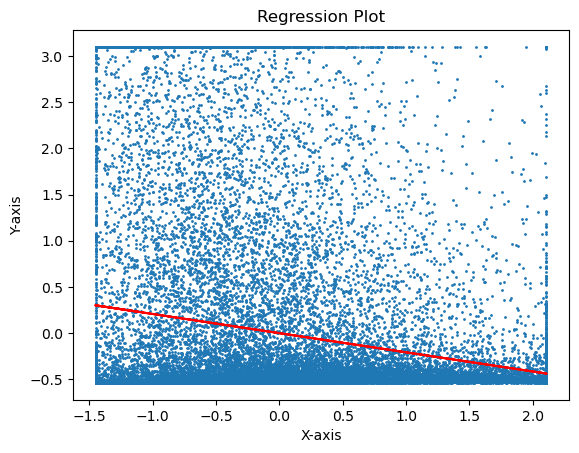

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


x = astro_stat
y = astro_stat_atac

x = np.clip(x, np.percentile(x, 5), np.percentile(x, 95))
y = np.clip(y, np.percentile(y, 5), np.percentile(y, 95))

x_reshaped = x.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# Initialize the scaler
scaler = StandardScaler()

# Scale x and y
x_scaled = scaler.fit_transform(x_reshaped).flatten()
y_scaled = scaler.fit_transform(y_reshaped).flatten()

# Calculate the 95th percentile
# x_95th = np.percentile(x_scaled, 95)
# y_95th = np.percentile(y_scaled, 95)

# Keep only values below the 95th percentile
# x_filtered = x_scaled[x_scaled <= x_95th]
# y_filtered = y_scaled[y_scaled <= y_95th]

x,y=x_scaled, y_scaled

# Create scatterplot
plt.scatter(x, y,s=1)

# Fit regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Regression Plot')
plt.show()

In [39]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(x, y)

print(f'Correlation coefficient: {corr_coef}')
print(f'P-value: {p_value}')


Correlation coefficient: -0.2074490297744906
P-value: 1.8226807697366482e-266


In [40]:
from statsmodels.stats.multitest import multipletests
p_adjusted = multipletests([p_value], method='fdr_bh')[1]


In [41]:
p_adjusted

array([1.82268077e-266])